In [26]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_val_score

In [27]:
X,y=make_regression(n_samples=100, n_features=1,n_informative=1, n_targets=1, noise=20)

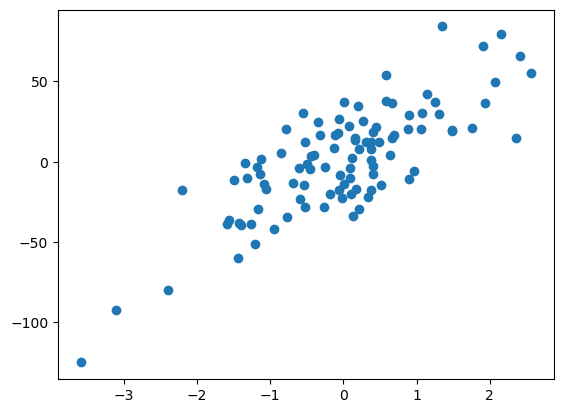

In [28]:
plt.scatter(X,y)

In [29]:
## Applying sklearn linear regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[23.3054919]
1.7502030951198042


In [33]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(0.4757595623919012)

In [34]:
class GDR:
    def __init__(self,learning_rate,epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs

        self.m_history=[]
        self.b_history=[]

    def fit(self,X,y):

        for i in range(self.epochs):
            ## Calc intercept----->>>     loss_slope= -2 * np.sum(y- m*X.ravel()-b)
            ## Calc slope ----->>>        Loss_slope= -2 * np.sum((y- m*X.ravel()-b)*X)
            loss_slope_b= -2 * np.sum(y- self.m*X.ravel()-self.b)
            loss_slope_m= -2 * np.sum((y- self.m*X.ravel()-self.b)*X.ravel())
            
            #update b and m
            self.b=self.b - (self.lr * loss_slope_b)
            self.m=self.m - (self.lr * loss_slope_m)

            self.m_history.append(self.m)
            self.b_history.append(self.b)

        print(self.m,self.b)


    def predict(self,X):
        return self.m * X + self.b

In [35]:
gd=GDR(0.001,50)

In [36]:
gd.fit(X,y)

23.30544148350955 1.7485129788061715


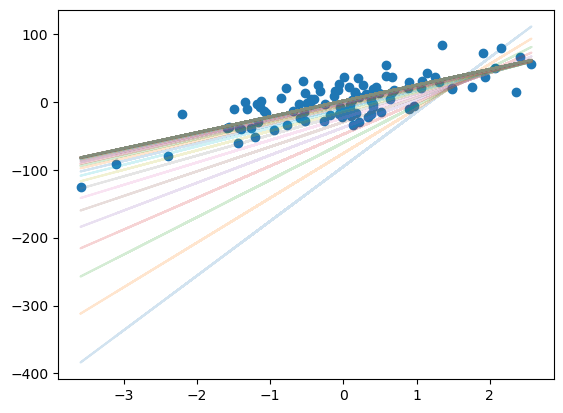

In [38]:
plt.scatter(X, y)

for i in range(len(gd.m_history)):
    y_pred = gd.m_history[i]*X + gd.b_history[i]
    plt.plot(X, y_pred, alpha=0.2)   # faint lines

plt.show()


In [47]:
gd=GDR(0.1,50)

In [48]:
gd.fit(X,y)           ## If value is high

1.0070462037120765e+71 -5.6787871806114395e+69


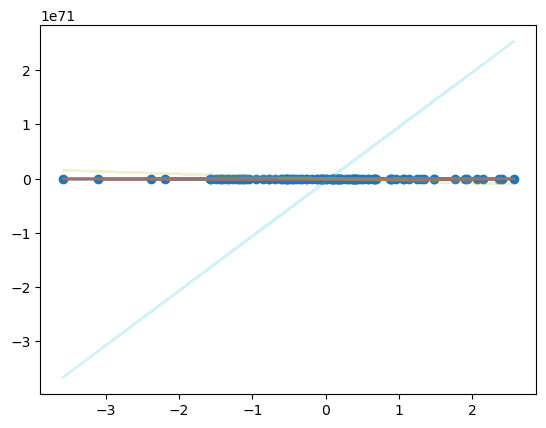

In [49]:
plt.scatter(X, y)

for i in range(len(gd.m_history)):
    y_pred = gd.m_history[i]*X + gd.b_history[i]
    plt.plot(X, y_pred, alpha=0.2)   # faint lines

plt.show()

In [58]:
gd=GDR(0.00001,5000)

In [61]:
gd.fit(X,y)           ## If learning is low  number of epochs increases from 50 to 5000

23.305491886026484 1.7502028547216124


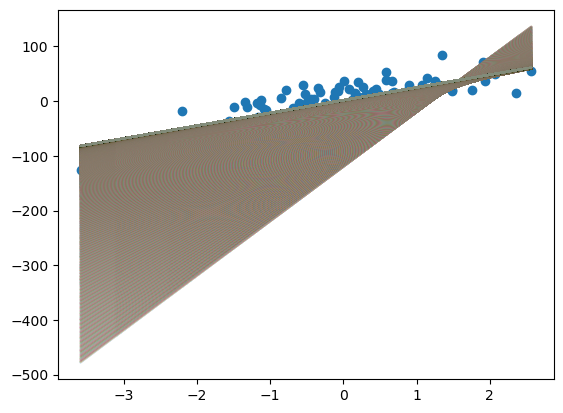

In [62]:
plt.scatter(X, y)

for i in range(len(gd.m_history)):
    y_pred = gd.m_history[i]*X + gd.b_history[i]
    plt.plot(X, y_pred, alpha=0.2)   # faint lines

plt.show()